In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

In [5]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

energy_consumption_data_train.head()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2,42923.00
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2,40497.00
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2,40872.00
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2,42470.75
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2,46082.25


In [17]:
energy_consumption_data_train.describe()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
count,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000,40496.000000
mean,0.209474,0.256724,0.519871,0.002143,0.210094,0.296840,0.478336,0.002377,0.179473,0.301408,0.498679,0.003928,0.185218,0.300868,0.488912,0.001308,2.470590,6.410979,42417.146181
std,0.110811,0.383131,0.140546,0.014191,0.096493,0.403578,0.164914,0.016449,0.103081,0.411494,0.167612,0.022552,0.100441,0.407535,0.164314,0.009922,1.117573,3.437434,12562.485658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2550.000000
25%,0.123711,0.000000,0.413919,0.000000,0.143617,0.000000,0.350394,0.000000,0.111111,0.000000,0.367589,0.000000,0.111801,0.000000,0.361277,0.000000,1.000000,3.000000,34337.375000
50%,0.195876,0.000000,0.509158,0.000000,0.202128,0.000000,0.462598,0.000000,0.154321,0.000000,0.490119,0.000000,0.167702,0.000000,0.479042,0.000000,2.000000,6.000000,43305.500000
75%,0.278351,0.516667,0.620879,0.000000,0.265957,0.683333,0.600394,0.000000,0.222222,0.716667,0.620553,0.000000,0.236025,0.700000,0.606786,0.000000,3.000000,9.000000,51314.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,12.000000,76049.000000


In [18]:
energy_consumption_data_test.describe()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
count,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.00000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.000000,10124.00000,10124.000000,10124.000000
mean,0.197644,0.272124,0.544653,0.002114,0.208456,0.30631,0.504652,0.002484,0.164709,0.341158,0.521827,0.003568,0.170357,0.332777,0.515113,0.001397,2.76047,7.329909,37376.127272
std,0.108223,0.388196,0.141543,0.014188,0.101656,0.40491,0.165646,0.018770,0.094119,0.425652,0.165973,0.028306,0.092966,0.419298,0.164402,0.012031,1.05336,3.238977,12920.453917
min,0.000000,0.000000,0.113553,0.000000,0.000000,0.00000,0.029528,0.000000,0.012346,0.000000,0.077075,0.000000,0.012422,0.000000,0.035928,0.000000,1.00000,1.000000,3143.250000
25%,0.118557,0.000000,0.437729,0.000000,0.138298,0.00000,0.375984,0.000000,0.098765,0.000000,0.385375,0.000000,0.105590,0.000000,0.381238,0.000000,2.00000,5.000000,28632.250000
50%,0.180412,0.000000,0.545788,0.000000,0.196809,0.00000,0.505906,0.000000,0.141975,0.000000,0.529644,0.000000,0.155280,0.000000,0.520958,0.000000,3.00000,8.000000,38095.250000
75%,0.257732,0.583333,0.644689,0.000000,0.260638,0.70000,0.624016,0.000000,0.203704,0.866667,0.646245,0.000000,0.217391,0.816667,0.636727,0.000000,4.00000,10.000000,46672.250000
max,0.871134,1.000000,1.032967,0.522293,0.936170,1.00000,1.011811,0.826087,0.728395,1.000000,0.986166,1.388889,0.913043,1.000000,0.976048,0.786389,4.00000,12.000000,70869.250000


## Exploring the Data for Station 02014 ##

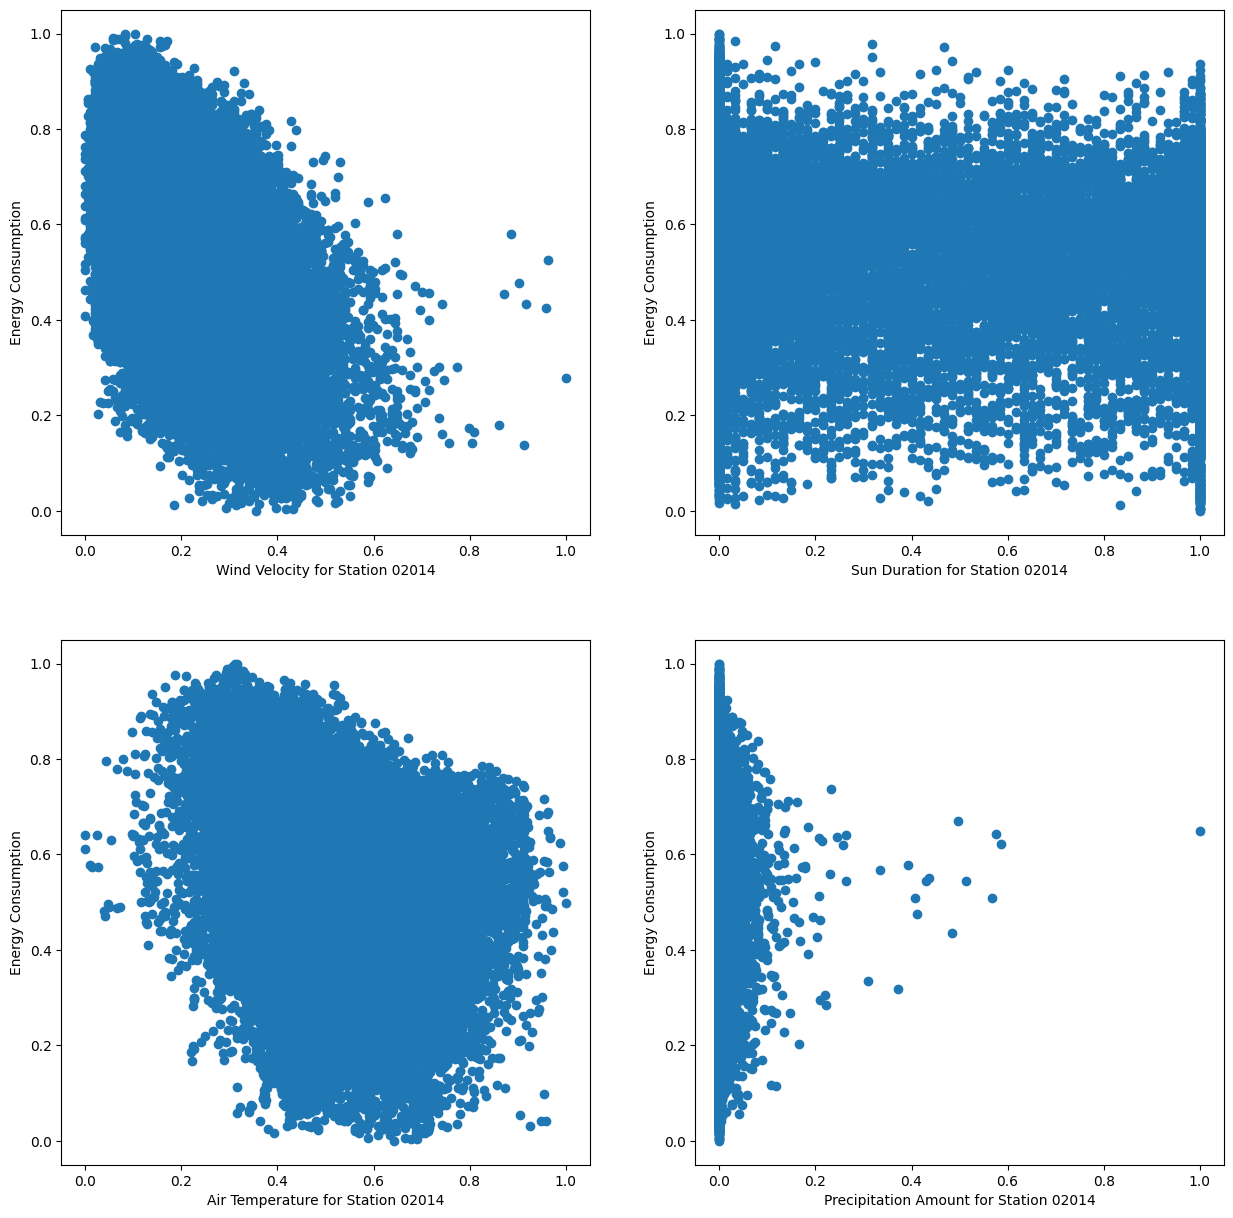

In [5]:
# create a list of all columns that we are considering
features = ['Wind Velocity for Station 02014', 'Sun Duration for Station 02014', 'Air Temperature for Station 02014', 'Precipitation Amount for Station 02014']

# create a figure and specify its size
fig = plt.figure(figsize=(15,15))

# go through all combinations and create one plot for each
figure_index = 1
for column in energy_consumption_data_train.columns[:4]:
    # add a sub plot to the figure
    axs = fig.add_subplot(2,2,figure_index)

    # normalizing
    scaler = MinMaxScaler()
    energy_consumption_data_train[[column, "Energy Consumption"]] = scaler.fit_transform(energy_consumption_data_train[[column, "Energy Consumption"]])
    
    # plot the feature combination
    axs.scatter(energy_consumption_data_train[column], energy_consumption_data_train["Energy Consumption"])
    
    # set the axis labels of the current sub plot
    axs.set_xlabel(column)
    axs.set_ylabel("Energy Consumption")
        
    # increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index+=1

    
# show the plot
plt.show()

## Applying Linear Regression for Station 02014 ##

In [29]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [1, 10, 20],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [30]:

for i, column in enumerate(energy_consumption_data_train.columns[0:1]):
    # Fit the linear regression model to the data
    X_TRAIN = energy_consumption_data_train[[column]]
    Y_TRAIN = energy_consumption_data_train["Energy Consumption"]

    # create and fit a linear regression
    estimator = RandomForestRegressor()

#    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
#    grid_search.fit(X_TRAIN, Y_TRAIN)

    rand_search = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', cv=5 )#, n_jobs=-1)
    rand_search.fit(X_TRAIN, Y_TRAIN)

    print("Best Hyperparameters: ", rand_search.best_params_)
    print("Best MSE: ", -rand_search.best_score_)
    print("Best RMSE: ", sqrt(-rand_search.best_score_))


    best_rf = rand_search.best_estimator_

print(best_rf)

/Users/I539028/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters:  {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}
Best MSE:  129218021.03229873
Best RMSE:  11367.410480505168
RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=20)


In [32]:


X_TEST = energy_consumption_data_test[[column]]
Y_TEST = energy_consumption_data_test["Energy Consumption"]

Y_PRED = best_rf.predict(X_TEST)


print("RMSE:", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("r-squared:", r2_score(Y_TEST, Y_PRED))

RMSE: 12431.618367660478
r-squared: 0.07414559805664156


In [19]:
energy_consumption_data_train.columns[:4]

Index(['Wind Velocity for Station 02014', 'Sun Duration for Station 02014',
       'Air Temperature for Station 02014',
       'Precipitation Amount for Station 02014'],
      dtype='object')

In [20]:
# reshaping target data to fit regressions requirements
features = energy_consumption_data_train["Energy Consumption"].values
features

array([42923.  , 40497.  , 40872.  , ...,  7180.5 ,  6128.75,  5717.  ])

In [21]:
features = energy_consumption_data_train["Energy Consumption"].values.reshape(-1, 1)
features

array([[42923.  ],
       [40497.  ],
       [40872.  ],
       ...,
       [ 7180.5 ],
       [ 6128.75],
       [ 5717.  ]])

RMSE: 12448.218207026213
r-squared: 0.0716713754788475
RMSE: 13547.248155341042
r-squared: -0.09948555804118464
RMSE: 13205.340234151481
r-squared: -0.04468785848100887
RMSE: 13870.03776490964
r-squared: -0.15250453756879256


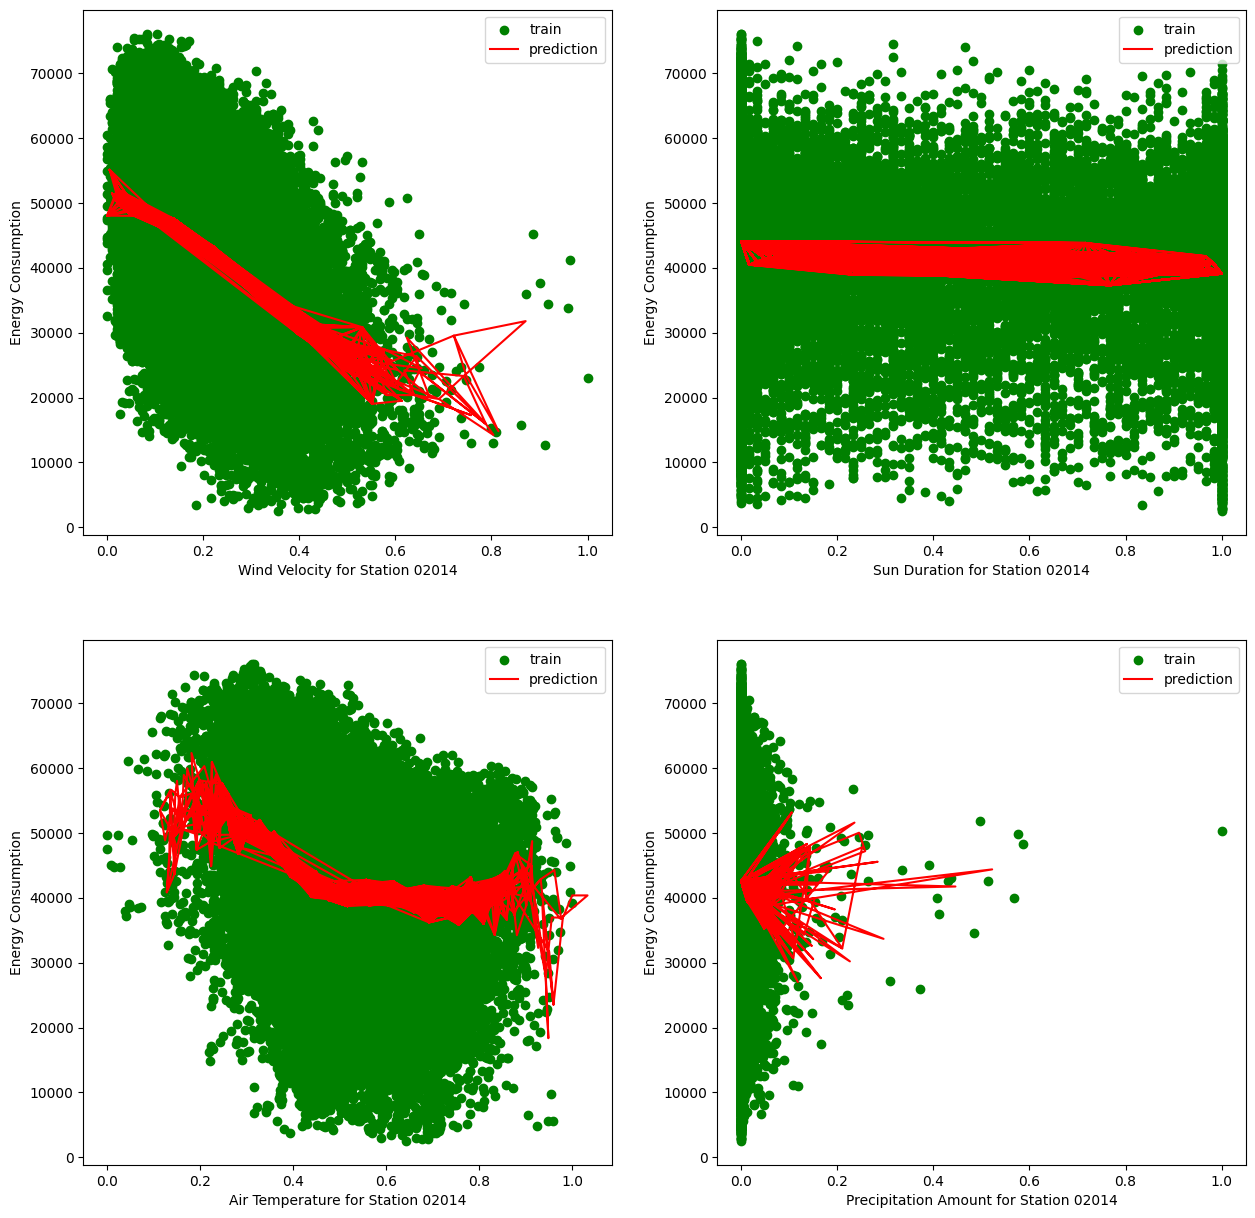

In [23]:

# create a figure and specify its size
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# plotting regression
#figure_index = 1
for i, column in enumerate(energy_consumption_data_train.columns[0:4]):
    # Fit the linear regression model to the data
    X_TRAIN = energy_consumption_data_train[[column]]
    Y_TRAIN = energy_consumption_data_train["Energy Consumption"]
    estimator.fit(X_TRAIN, Y_TRAIN)

    #axs = fig.add_subplot(2,2,figure_index)
    ax = axs[i // 2, i % 2]

    # plot the original values
    ax.scatter(X_TRAIN, Y_TRAIN, c='green', label='train')


    X_TEST = energy_consumption_data_test[[column]]
    Y_PRED = estimator.predict(X_TEST)
    # plot the predicted values
    ax.plot(X_TEST, Y_PRED, c='red', label='prediction')

    ax.set_xlabel(column)
    ax.set_ylabel('Energy Consumption')
    ax.legend()

    Y_TEST = energy_consumption_data_test["Energy Consumption"]



    print("RMSE:", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
    print("r-squared:", r2_score(Y_TEST, Y_PRED))


    # increase the figure index (otherwise all plots are drawn in the first subplot)
    #figure_index+=1

#    display(X_TEST)
#    display(Y_TEST.describe())


# show the plot
#plt.show()

Wind Velocity for Station 02014
Best Hyperparameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 5}
Best Score (MSE): 128986377.54138596
RMSE: 11357.216980466032
R-squared: 0.07322332896555772


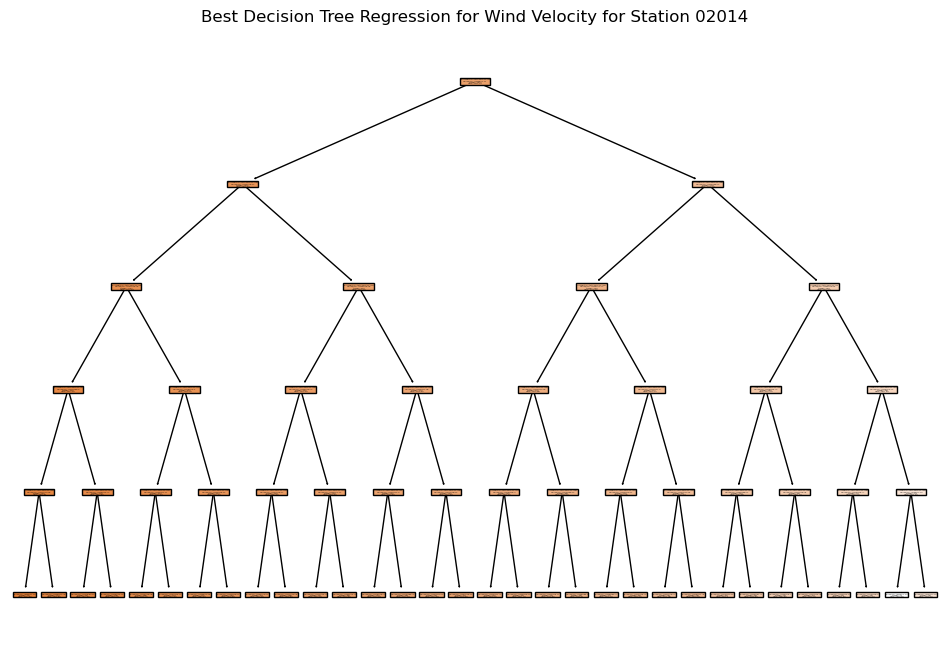

Sun Duration for Station 02014
Best Hyperparameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 1}
Best Score (MSE): 159875123.12753084
RMSE: 12644.173485346158
R-squared: -0.103998655212316


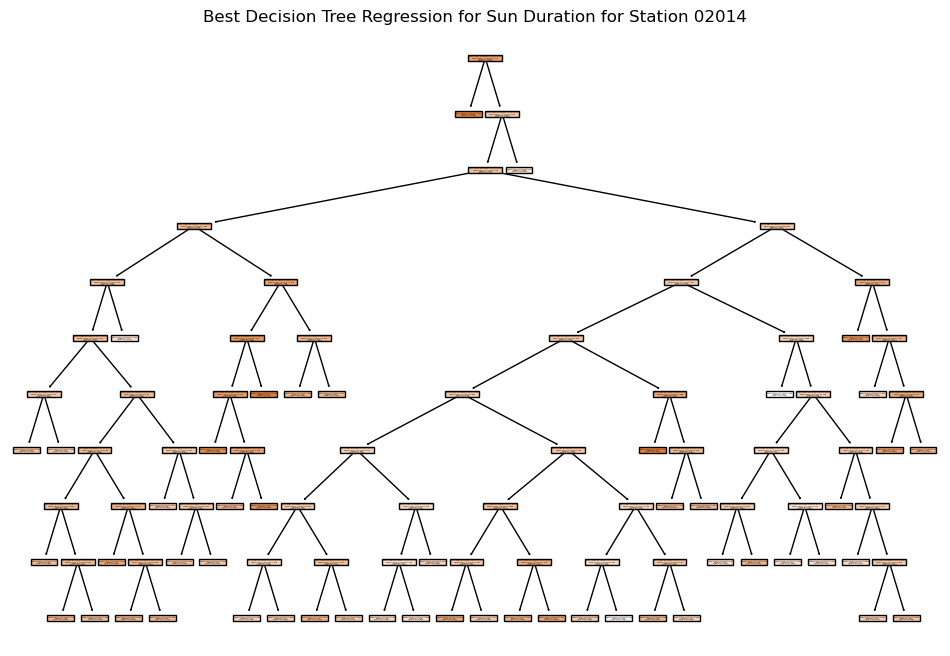

Air Temperature for Station 02014
Best Hyperparameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 10}
Best Score (MSE): 153764282.88431603
RMSE: 12400.172695745654
R-squared: -0.04116881157967778


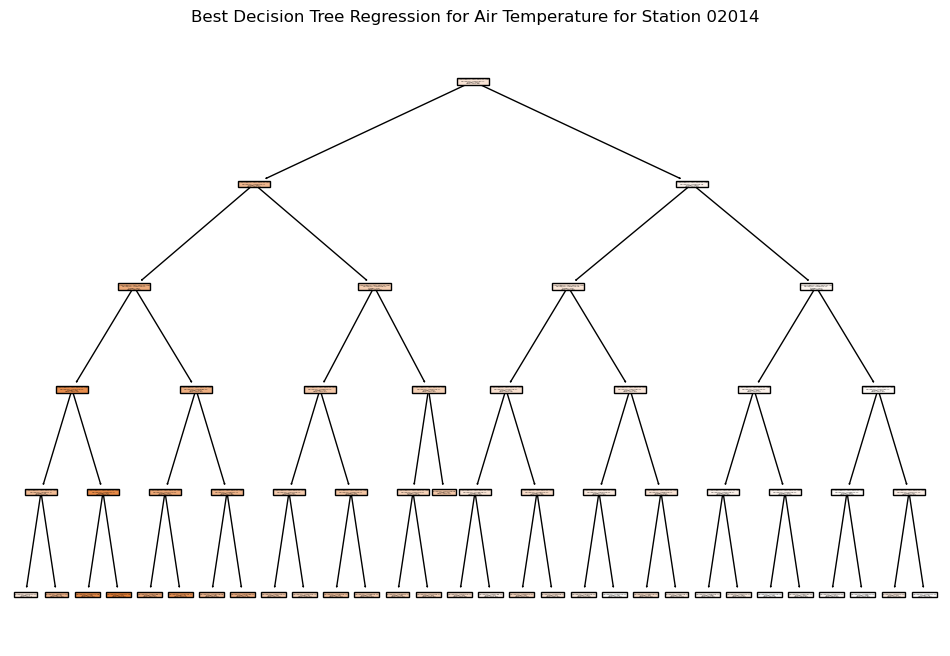

Precipitation Amount for Station 02014
Best Hyperparameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 1}
Best Score (MSE): 162787523.51135677
RMSE: 12758.821399775012
R-squared: -0.14971403589861154


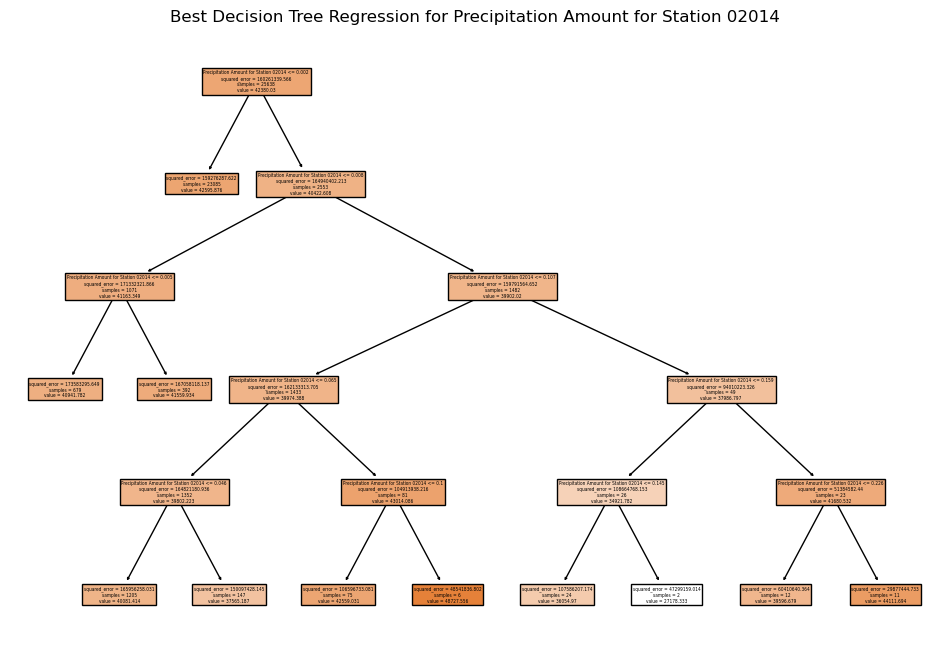

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (4).

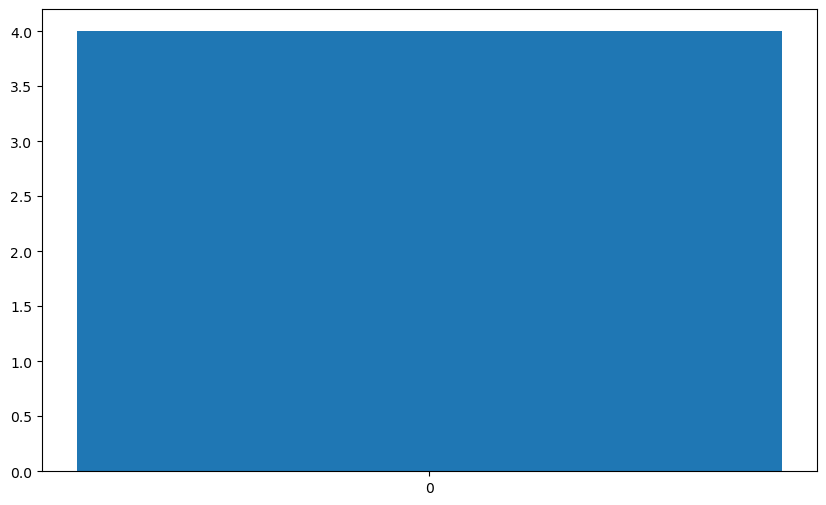

In [24]:
param_grid = {
    'regressor__n_estimators': [1, 5, 10],
    'regressor__max_depth': [5, 10, 15, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

regressor = RandomForestRegressor()

# Fit the linear regression model to the data
X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train["Energy Consumption"]
    
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_train.columns[:-1]]
Y_TEST = energy_consumption_data_test["Energy Consumption"]

best_regressor = grid_search.best_estimator_
best_regressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = best_regressor.predict(X_TEST)

print(column)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)
print("RMSE:", sqrt(-grid_search.best_score_))
print("R-squared:", r2_score(Y_TEST, Y_PRED))

# Get the individual trees in the Random Forest
estimators = best_regressor.named_steps['regressor'].estimators_

# Get the feature names as a list
feature_names = list(X_TRAIN.columns)

# Plot the Best Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_regressor.named_steps['regressor'], filled=True, feature_names=feature_names)
plt.title(f"Best Decision Tree Regression for {column}")
plt.show()

## Evaluation with RSME ##